In [338]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#Remove the warning
import warnings 
warnings.filterwarnings("ignore")


# Classification using Random Forest

In [339]:
#load the data  set
df=sns.load_dataset("tips")
#Print the last five lines

df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# EDA

In [340]:
df1=df['total_bill']
mean=df1.mean()
median=df1.median()
mode=df1.mode()

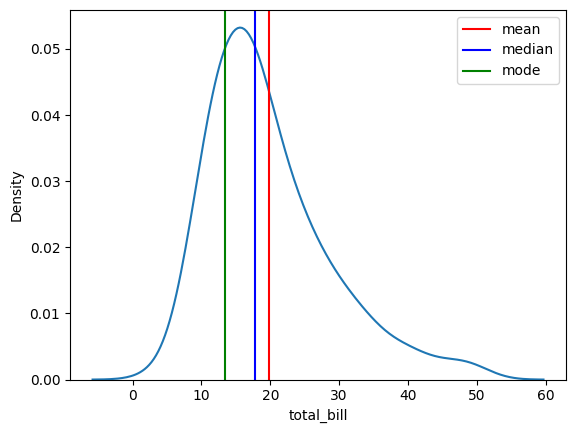

In [341]:
sns.distplot(df1,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

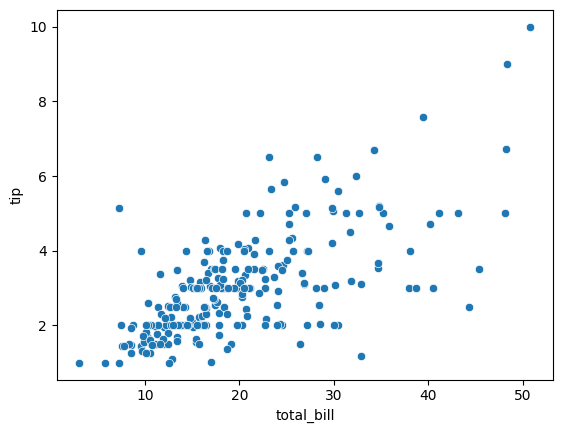

In [342]:
ax=sns.scatterplot(df,x="total_bill",y="tip")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


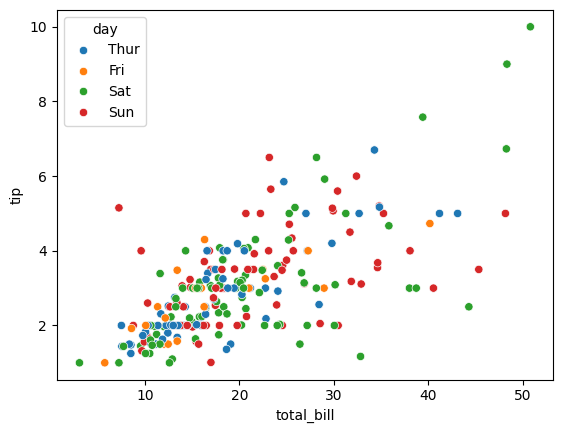

In [343]:
ax=sns.scatterplot(df,x="total_bill",y="tip",hue="day")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


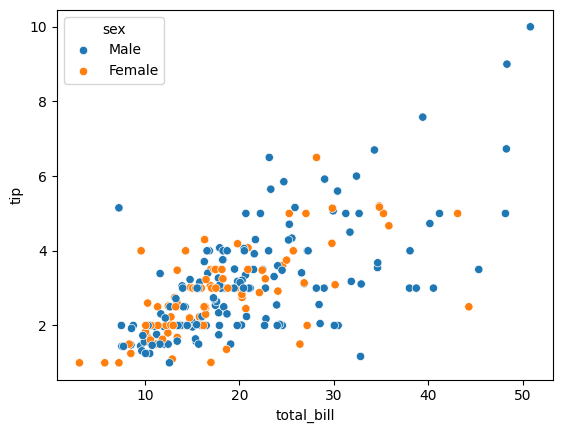

In [344]:
ax=sns.scatterplot(df,x="total_bill",y="tip",hue="sex")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


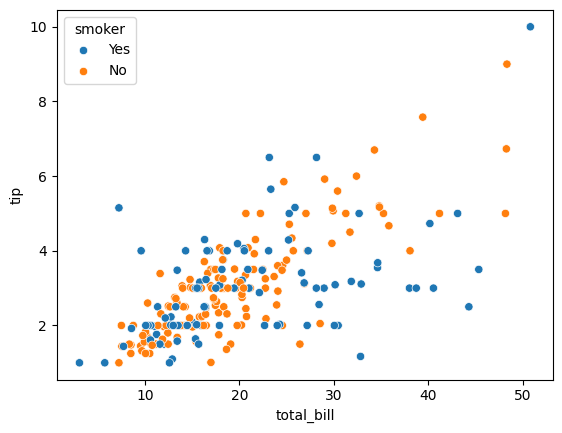

In [345]:
ax=sns.scatterplot(df,x="total_bill",y="tip",hue="smoker")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


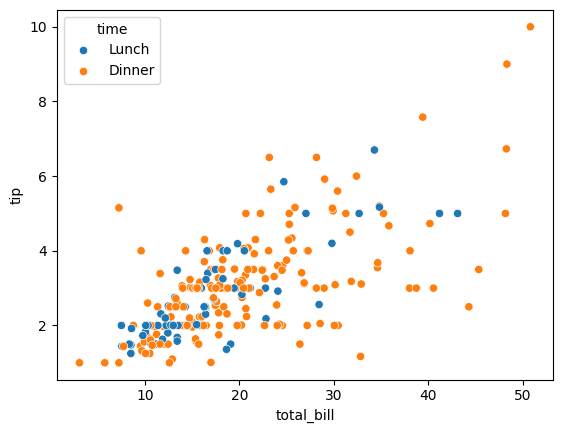

In [346]:
ax=sns.scatterplot(df,x="total_bill",y="tip",hue="time")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("total_bill")
    plt.ylabel("tip")
plt.show()


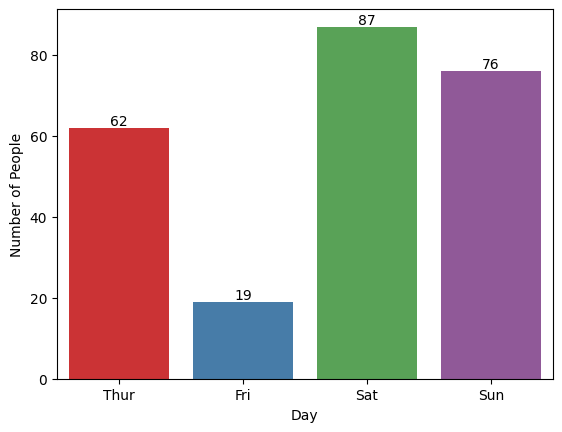

In [347]:
ax=sns.countplot(df,x=df["day"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Day")
    plt.ylabel("Number of People")
plt.show()


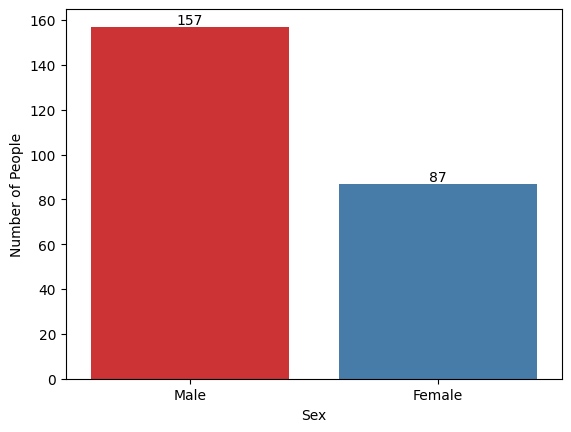

In [348]:
ax=sns.countplot(df,x=df["sex"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Sex")
    plt.ylabel("Number of People")
plt.show()

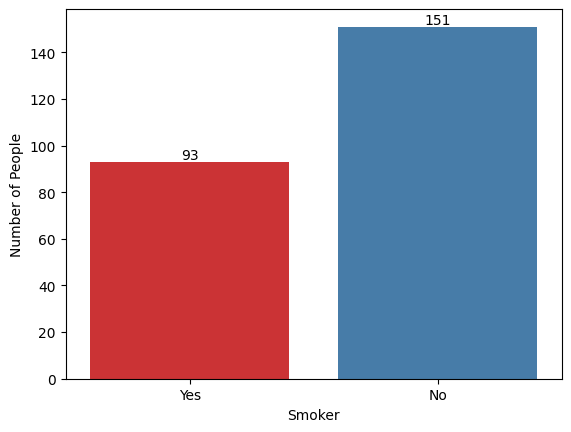

In [349]:
ax=sns.countplot(df,x=df["smoker"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Smoker")
    plt.ylabel("Number of People")
plt.show()

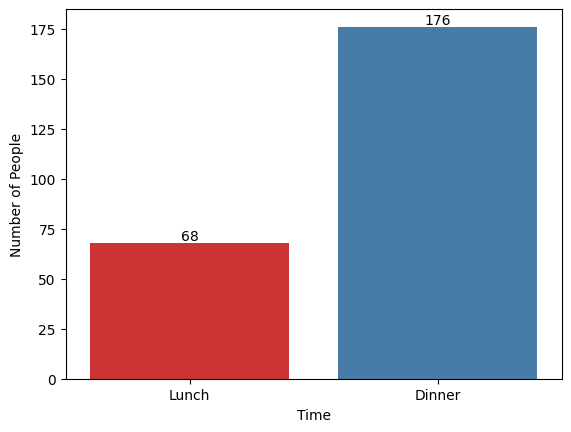

In [350]:
ax=sns.countplot(df,x=df["time"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Time")
    plt.ylabel("Number of People")
plt.show()

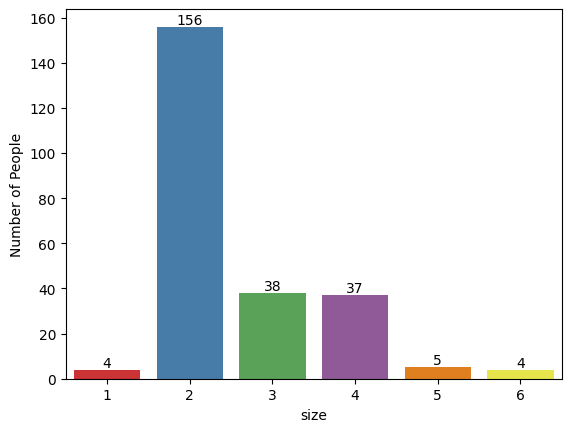

In [351]:
ax=sns.countplot(df,x=df["size"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("size")
    plt.ylabel("Number of People")
plt.show()

# Data Preprocessing

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [353]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [354]:
df=df.drop_duplicates()

In [355]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,243.0,19.813868,8.910071,3.07,13.38,17.81,24.175,50.81
tip,243.0,3.002387,1.385002,1.00,2.00,2.92,3.575,10.00
size,243.0,2.572016,0.952356,1.00,2.00,2.00,3.000,6.00


In [356]:
df1=df.copy()

In [357]:

#Aplly the label encodel for classificatioin
lb=LabelEncoder()
for i in df1.columns:
    if df1[i].dtype=="object" or df1[i].dtype=='category':
        df1[i]=lb.fit_transform(df1[i])
    
df1.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3


In [358]:
df1.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.674998,0.141350,0.090136,-0.039472,-0.179232,0.597589
tip,0.674998,1.000000,0.085274,0.009763,-0.007537,-0.117596,0.488400
sex,0.141350,0.085274,1.000000,0.009930,-0.071308,-0.198129,0.083248
smoker,0.090136,0.009763,0.009930,1.000000,-0.291941,-0.063911,-0.130564
day,-0.039472,-0.007537,-0.071308,-0.291941,1.000000,0.634812,0.073204
time,-0.179232,-0.117596,-0.198129,-0.063911,0.634812,1.000000,-0.100045
size,0.597589,0.488400,0.083248,-0.130564,0.073204,-0.100045,1.000000


# Apply model

In [359]:
df1.drop(columns=["day","time"],axis=1,inplace=True)

Classification Report : = 
               precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.73      0.94      0.82        35

    accuracy                           0.71        49
   macro avg       0.62      0.54      0.52        49
weighted avg       0.67      0.71      0.65        49

Confusion matrix = 
 [[ 2 12]
 [ 2 33]]


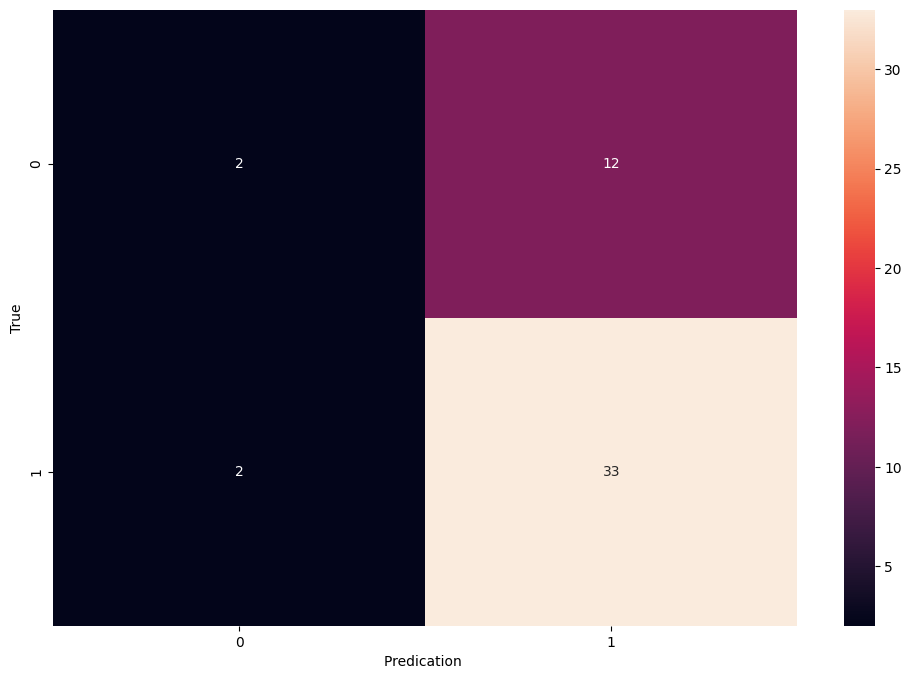

In [360]:
#Seprate the feature and target variable
X=df1.drop("sex",axis=1)
Y=df1["sex"]

#train test and split the data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#build the model
#model=RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 4, n_estimators= 100)

model=RandomForestClassifier(n_estimators=500, max_depth= 4, criterion='entropy', bootstrap= True)
#Train the model
model.fit(X_train,Y_train)

#predict the model

Y_pred=model.predict(X_test)

#check the model performance

print("Classification Report : = \n",classification_report(Y_test,Y_pred))
print("Confusion matrix = \n",confusion_matrix(Y_test,Y_pred))

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.xlabel("Predication ")
plt.ylabel("True")
plt.show()

# Hyperparameter Tuning

In [361]:
%%time
# Check the best parameter for model

from sklearn.model_selection import GridSearchCV

#Create the parameter grid
param_grid={
    "n_estimators":[50,100,200,300,400,500],
    "max_depth":[4,5,6,7,8,9,10],
    "criterion":["gini","entropy"],
    "bootstrap":[True,False]

}

#set the grid
grid=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,#cross validation
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

#fit the model
grid.fit(X,Y)

#print the best parameter
print(f"Best parameter {grid.best_params_}")

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best parameter {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 400}
CPU times: total: 3.16 s
Wall time: 1min 40s


# Predication

In [362]:
df1.head()

,total_bill,tip,sex,smoker,size
0,16.99,1.01,0,0,2
1,10.34,1.66,1,0,3
2,21.01,3.50,1,0,3
3,23.68,3.31,1,0,2
4,24.59,3.61,0,0,4


In [363]:
#predication
model.predict([[24.59,	3.61,	0,	4]])

#1 --> Male
#0 --> Female
#array([1]) show the male

array([1])

# Regression using Random forest

In [364]:
df2=df.copy()

In [365]:
#Aplly the label encodel for classificatioin
lb=LabelEncoder()
for i in df2.columns:
    if df2[i].dtype=="object" or df2[i].dtype=='category':
        df2[i]=lb.fit_transform(df2[i])
    
df2.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3


In [366]:
df2.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.674998,0.141350,0.090136,-0.039472,-0.179232,0.597589
tip,0.674998,1.000000,0.085274,0.009763,-0.007537,-0.117596,0.488400
sex,0.141350,0.085274,1.000000,0.009930,-0.071308,-0.198129,0.083248
smoker,0.090136,0.009763,0.009930,1.000000,-0.291941,-0.063911,-0.130564
day,-0.039472,-0.007537,-0.071308,-0.291941,1.000000,0.634812,0.073204
time,-0.179232,-0.117596,-0.198129,-0.063911,0.634812,1.000000,-0.100045
size,0.597589,0.488400,0.083248,-0.130564,0.073204,-0.100045,1.000000


In [367]:
#Aplly the label encodel for classificatioin
df2["total_bill"]=MinMaxScaler().fit_transform(df2[["total_bill"]])
df2["tip"]=MinMaxScaler().fit_transform(df2[["tip"]])

In [368]:
%%time
#Separate the feature and target variable

x=df2.drop('tip',axis=1)

y=df2["tip"]


#Train test and split the data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#Build the model
model2=RandomForestRegressor(bootstrap=True, max_depth=None, min_samples_leaf= 2, min_samples_split= 10, n_estimators= 50,random_state=42)

#train the model
model2.fit(X_train,Y_train)

#Predict the model
Y_pred=model2.predict(X_test)

print("MSE = ",mean_squared_error(Y_test,Y_pred))
print("MAE = ",mean_absolute_error(Y_test,Y_pred))
print("R2 score = ",r2_score(Y_test,Y_pred))



MSE =  0.014861625669607631
MAE =  0.08649257946054063
R2 score =  0.5059289943397445
CPU times: total: 93.8 ms
Wall time: 172 ms


In [369]:
df2.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,0.308965,0.083333,1,0,1,0,2
243,0.329074,0.222222,0,0,3,0,2


# Hyperparameter tuning

In [370]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid and RandomForestRegressor model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestRegressor()

# Set up GridSearchCV with a regression-appropriate scoring metric
grid_search = GridSearchCV(
    estimator=model2,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # or 'r2', 'neg_mean_absolute_error'
    cv=5,
    n_jobs=-1
)

# Fit the model to find the best parameters
grid_search.fit(x,y)

# Output best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best negative MSE score:", grid_search.best_score_)


Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best negative MSE score: -0.013567672809595538


**Improve the model accuracy it is not good**